This part will read the file and convert each line into a dictionary. The return will be a dictionary with the key-value pair being the tut group no. and list with the dictionary that has the student's info inside that.

1. Read file
2. Convert each line into a dictionary
3. Gather the dictionary from 2. into one big list
4. Rearrange the list from 3. into a dictionary that satisfies all conditions

-----------------------------------------------------------------------------------
Pseudocode

START

OPEN file "record.csv"

READ 1 line to skip header

SET empty list called "students"

FOR line in file

		READ 1 line

		CONVERT line into dictionary that contain student's information

		APPEND dictionary into students

ENDFOR

SET empty dictionary called "groups"

FOR stu in students

		GET tutorial_group from stu

		IF tutorial_group not in groups THEN

			CREATE key: tutorial_group, value: []

		ENDIF

		APPEND stu into groups["tutorial_group"]

ENDFOR

RETURN groups

END

----------------------------------------------------------------------------------------------------------------

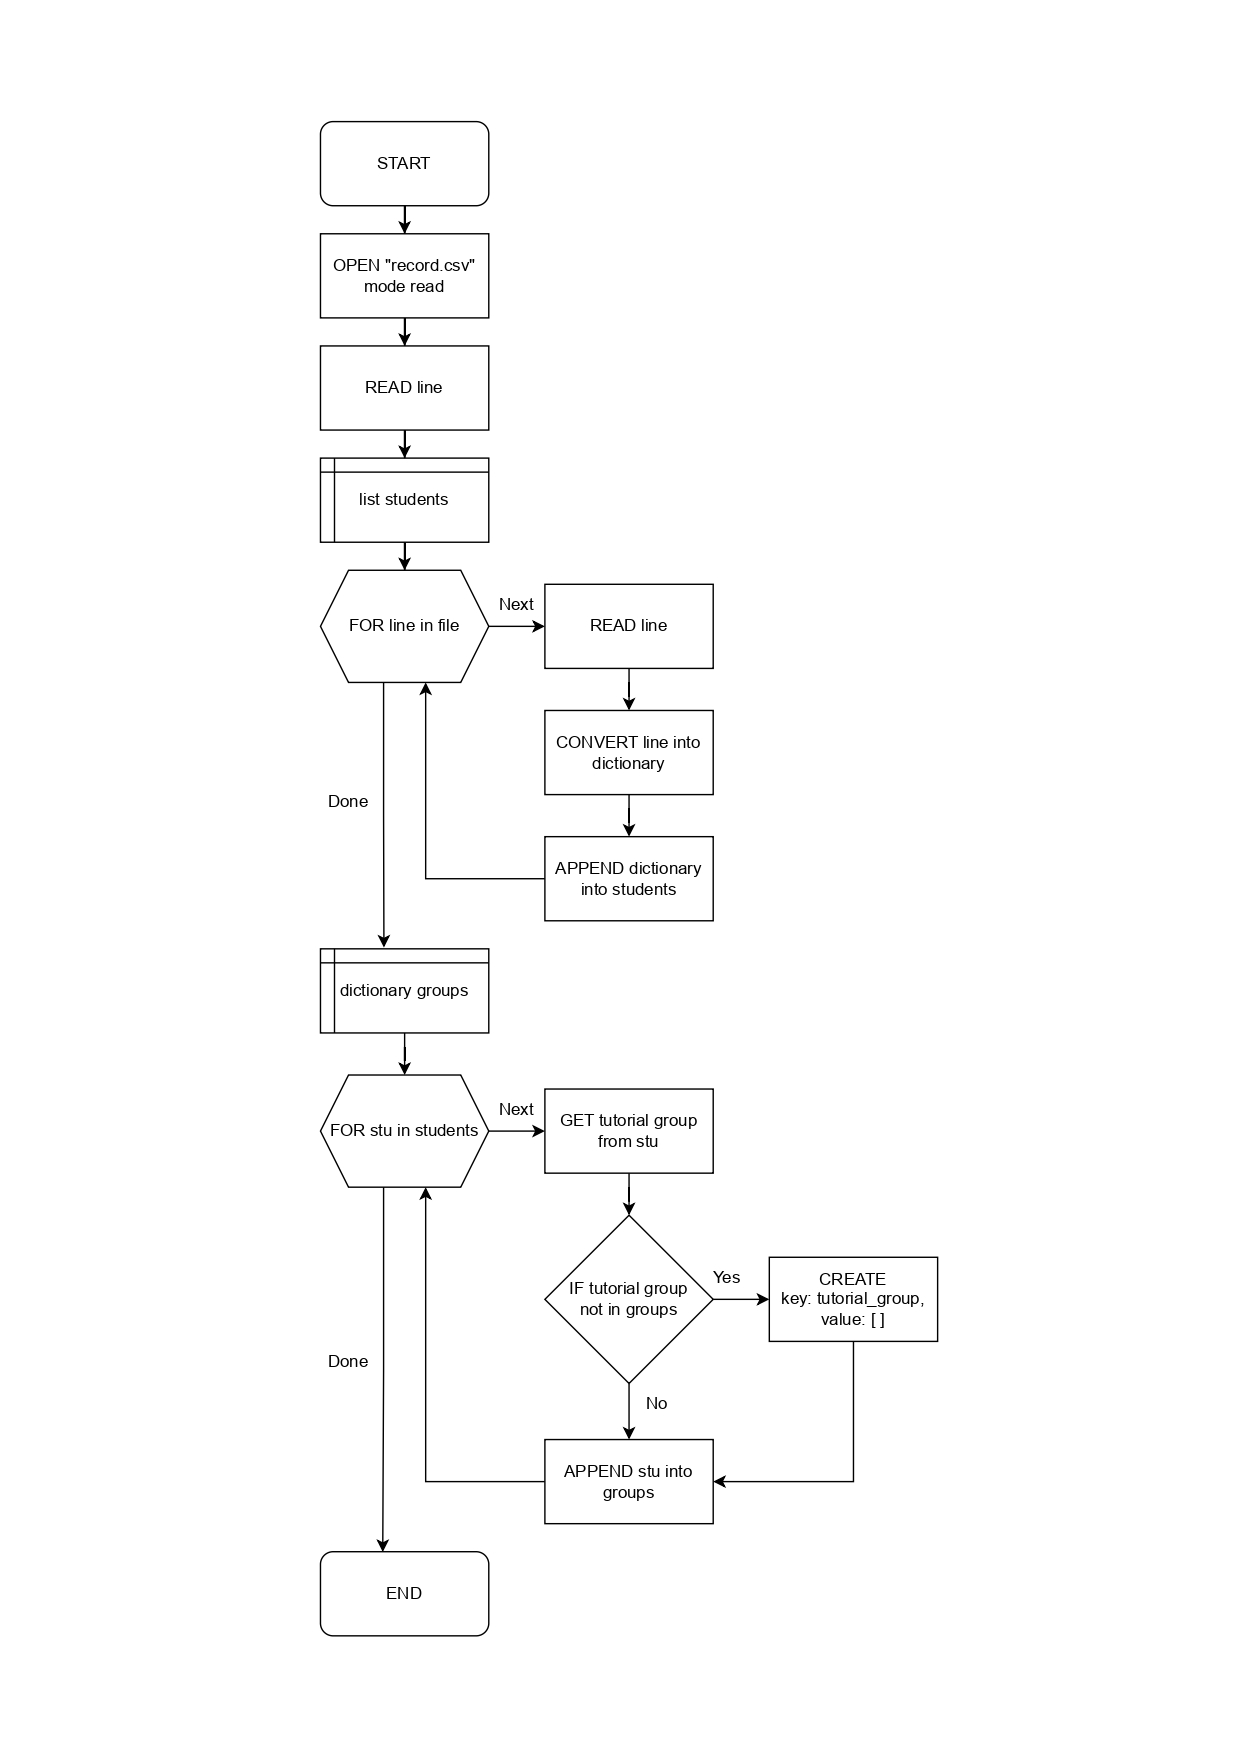

----------------------------------------------------------------------------------------------------------------

In [ ]:
#Function to read the files

#function convert each line to dictionary
def ConvertToDict(line):
    #split line into list with ,
    lists = line.strip().split(",")

    #return dictionary
    return{
        "tutorial_group" : lists[0],
        "student_id" : lists[1],
        "school" : lists[2],
        "name" : lists[3],
        "gender" : lists[4],
        "cgpa" : float(lists[5])
    }

#function append each dictionary to 1 big list
def OneBigList(data = "records.csv"):
    #create 1 big list
    students = []

    #read each line from file
    with open(data, "r", encoding="utf-8") as file:
        #skip header
        header = file.readline().strip()

        #read each line and append to students
        for line in file:
            line = line.strip()
            students.append(ConvertToDict(line))
    return students

#function to gather same tut group in 1 dictionary with key = tut no.
def GroupByTut(students):
    #create dictionary
    groups = {}

    #d is dictionary
    for d in students:
        #assign tut no.
        tutno = d["tutorial_group"]

        #check tutno in groups
        if tutno not in groups:
            #create key in groups
            groups[tutno] = []
        
        #append data into groups(list)
        groups[tutno].append(d)

    #return big dictionary
    return groups

#comebine functions
def readfile():
    students = OneBigList("records.csv")
    groups = GroupByTut(students)
    return groups

This part will analyze the dictionary that we create in the first step. The return will be 3 graphs that contain no. of male, mean cgpa, and no. of max students from same school.

1. calculate no. of male, mean cgpa, and no. of max students from same school in each tut group
2. plot no. of male graph
3. plot mean cgpa graph
4. plot max students from same school graph

-----------------------------------------------------------------------------------------

START

GET groups

SET empty dictionary called "analysis"

FOR tut, members in groups

		Count no. of male students in members

		Evaluate mean cgpa in members

		Count no. of max students from same school in members

		Store results in analysis dictionary:

			analysis[tut] = {

				"male": no. of male students

				"mean_cgpa": mean cgpa

				"school_max": no. of max students from same school

			}

ENDFOR

Plot male count graph

Plot mean CGPA graph

Plot school_max graph

---------------------------------------------------------------------------------------

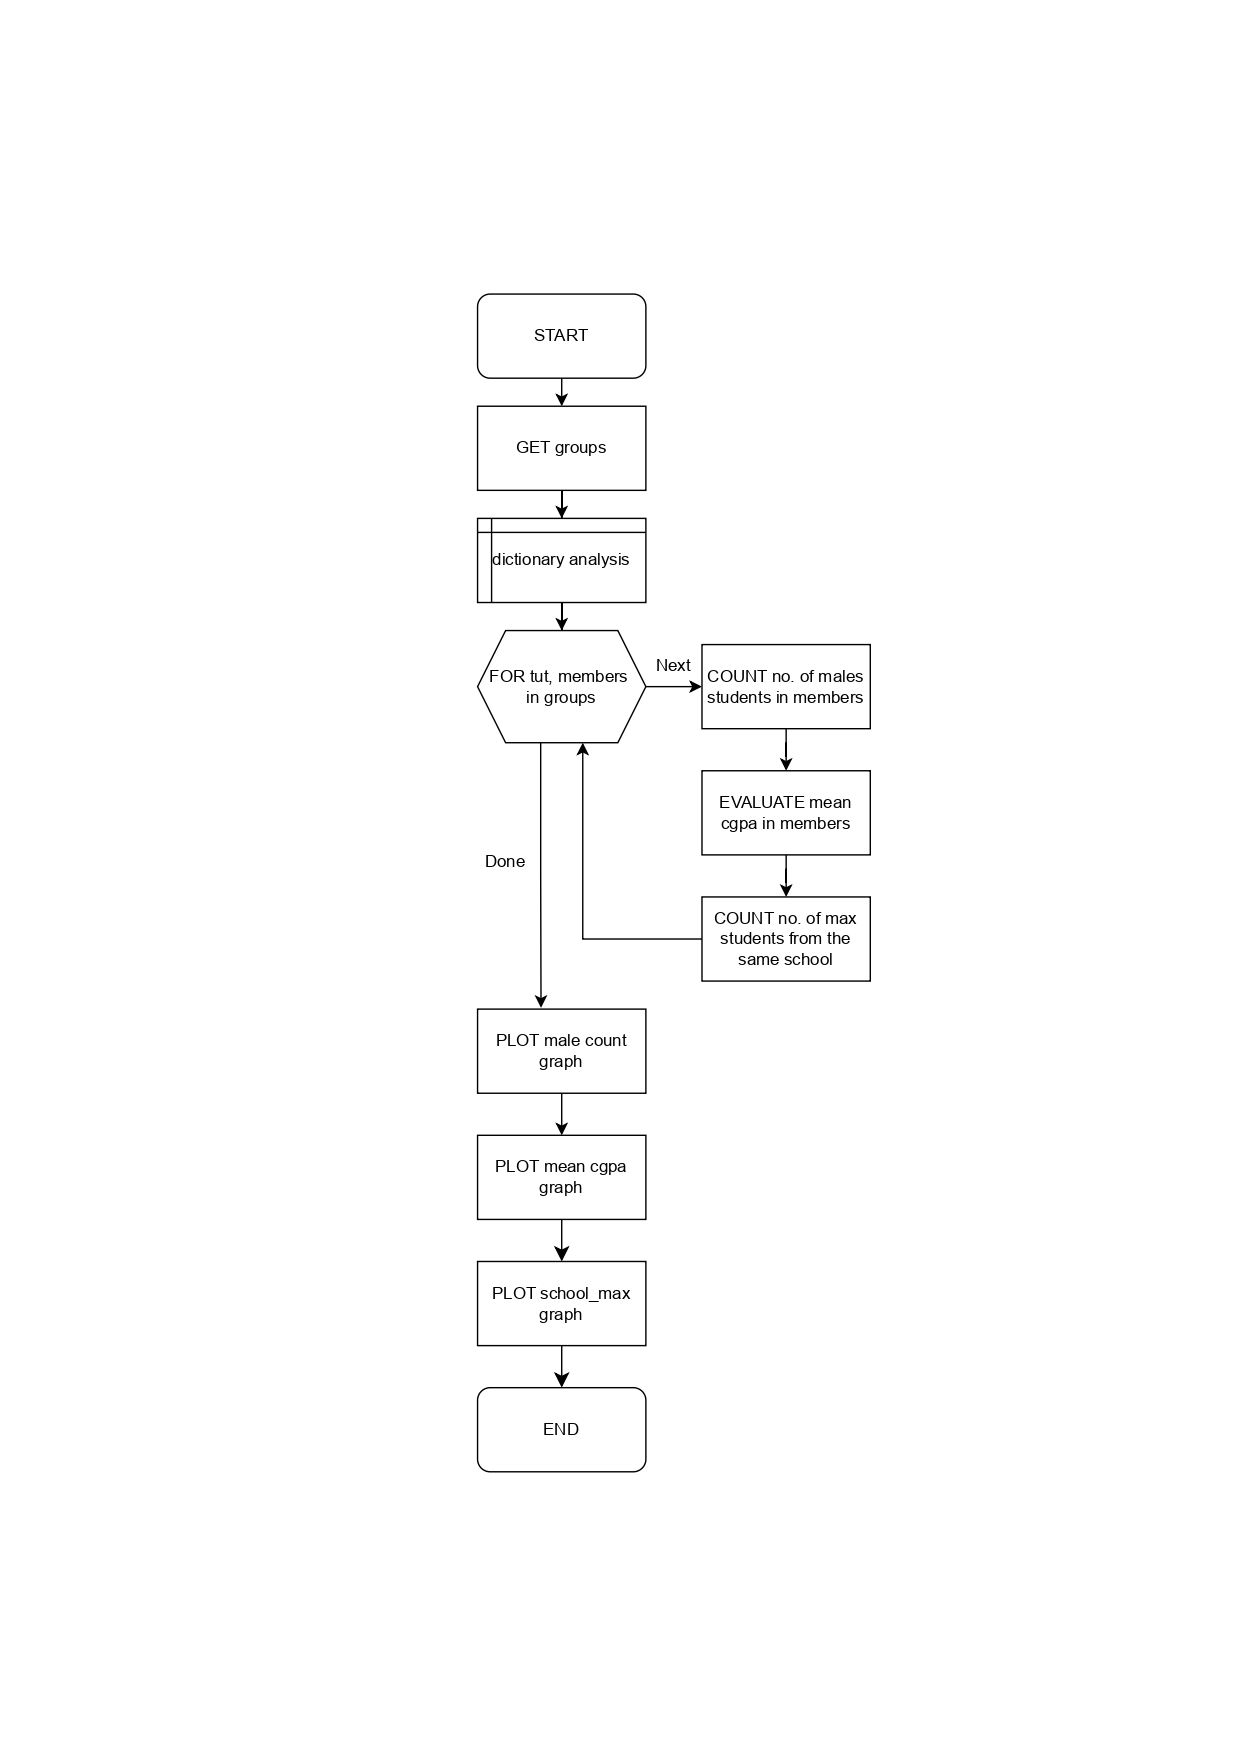

---------------------------------------------------------------------------------------

In [ ]:
#Data analysis part for presorting

#analyze data
def Analyze(groups):
    analysis = {}

    for tut, members in groups.items():
        #gender count
        male = sum(1 for s in members if s["gender"] == "Male")
        female = len(members) - male

        #mean cgpa
        mean_cgpa = sum(s["cgpa"] for s in members) / len(members)

        #dominant school max(highest)
        school_count = {}

        for s in members:
            school = s["school"]
            if school not in school_count:
                school_count[school] = 0
            school_count[school] += 1
        school_max = max(school_count.values())

        analysis[tut] = {
            "male": male,
            "female": female,
            "mean_cgpa": mean_cgpa,
            "school_max": school_max
        }
    return analysis

#plot graph
import matplotlib.pyplot as plt
import math

#gender per tut group
def PlotMaleRange(analysis):
    # Extract male counts
    male_counts = [analysis[t]["male"] for t in analysis]

    # Define ranges
    bins = [(0,10), (11,20), (21,30), (31,40), (41,50)]
    labels = [f"{b[0]}–{b[1]}" for b in bins]

    # Count groups in each range
    male_grouped = []
    for low, high in bins:
        male_grouped.append(sum(1 for x in male_counts if low <= x <= high))

    # Plot
    x = list(range(len(labels)))
    plt.figure(figsize=(10,5))

    plt.bar(x, male_grouped, color='#4A90E2')

    plt.xticks(x, labels)
    plt.xlabel("Male Student Count Range")
    plt.ylabel("Number of Tutorial Groups")
    plt.title("Distribution of Male Students per Tutorial Group")
    plt.tight_layout()
    plt.show()

#mean cgpa in tut group
def PlotCGPA(analysis):
    # extract mean CGPA values
    means = [data["mean_cgpa"] for data in analysis.values()]

    if not means:
        print("No data to plot.")
        return

    # smaller bin size for more detailed distribution
    step = 0.01

    low = math.floor(min(means) / step) * step
    high = math.ceil(max(means) / step) * step

    num_bins = int(round((high - low) / step))
    bins = [low + i * step for i in range(num_bins + 1)]

    plt.figure()
    plt.hist(means, bins=bins, rwidth=0.9)

    plt.xlabel("Mean CGPA (per tutorial group)")
    plt.ylabel("Number of tutorial groups")
    plt.title("Distribution of Mean CGPA across tutorial groups")
    plt.xticks(bins[::2], rotation=45)  # label every 2 bins to reduce clutter
    plt.tight_layout()
    plt.show()

#dominant school max
def PlotSchoolMax(analysis):
    # extract values
    max_counts = [data["school_max"] for data in analysis.values()]

    # count how many tutorial groups for each unique value
    unique_vals = sorted(set(max_counts))
    counts = [max_counts.count(v) for v in unique_vals]

    plt.figure()

    # draw bar chart with each bar centered at the integer value
    plt.bar(unique_vals, counts, width=0.8, align='center')

    plt.xlabel("Max number of students from the same school")
    plt.ylabel("Number of tutorial groups")
    plt.title("Distribution of dominant school size across tutorial groups")

    # x-axis ticks exactly at the integer centers
    plt.xticks(unique_vals)

    plt.tight_layout()
    plt.show()

groups = readfile()

analysis = Analyze(groups)

PlotMaleRange(analysis)
PlotCGPA(analysis)
PlotSchoolMax(analysis)

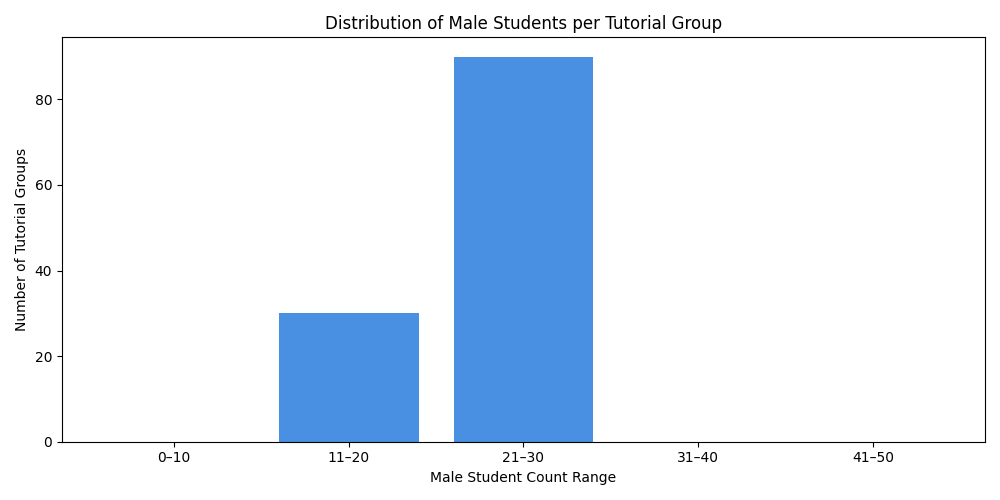

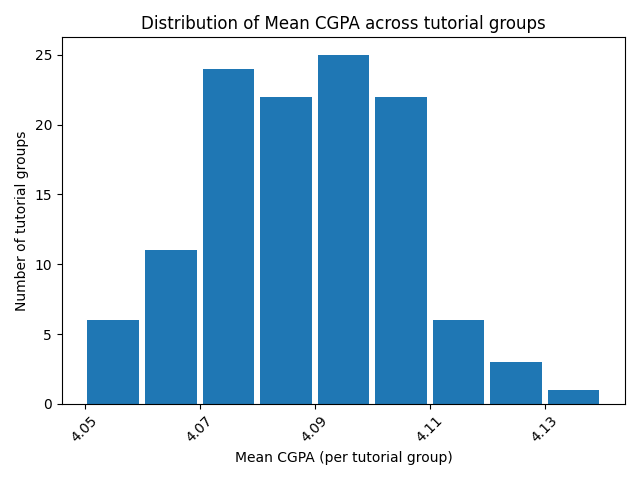 

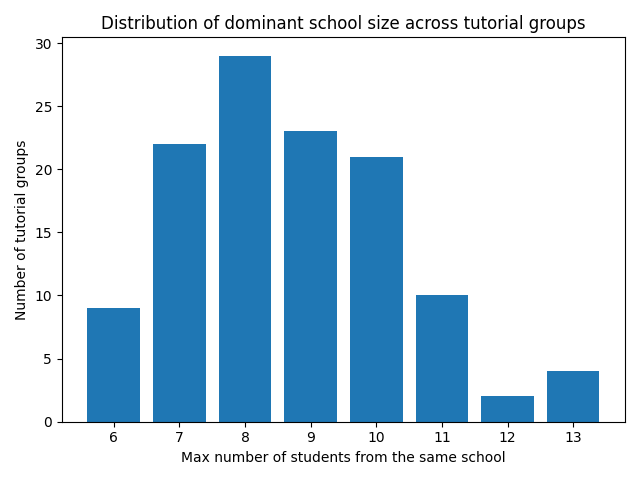